---
title: "Exploratory Data Analysis"
format: 
  html:
    embed-resources: true
---

### Imports
We start by importing key libraries for preprocessing (`StandardScaler`), dimensionality reduction (`PCA`), and data visualization (`matplotlib`, `seaborn`), along with pandas for data manipulation.
The cleaned dataset is loaded using `pd.read_csv()`, and we explore it using `head()`, `info()`, and` describe()` to get a feel for the data, types, and basic statistics.

In [1]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load cleaned dataset
df = pd.read_csv("../data/clean/cleaned_school_data.csv")

# Display first few rows of the dataset
df.head()

# Get data types and non-null counts
df.info()

# Descriptive statistics for all numeric columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12800 entries, 0 to 12799
Data columns (total 59 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   state_name                            12800 non-null  object 
 1   leaid                                 12800 non-null  int64  
 2   lea_name                              12800 non-null  object 
 3   total_students                        12800 non-null  int64  
 4   num_chronically_absent_students       12800 non-null  int64  
 5   chronic_absentee_ratio                12800 non-null  float64
 6   am_indian_female                      12800 non-null  float64
 7   am_indian_male                        12800 non-null  float64
 8   am_indian_total                       12800 non-null  float64
 9   asian_female                          12800 non-null  float64
 10  asian_male                            12800 non-null  float64
 11  asian_total    

,leaid,total_students,num_chronically_absent_students,chronic_absentee_ratio,am_indian_female,am_indian_male,am_indian_total,asian_female,asian_male,asian_total,...,total_federal_revenue,total_state_revenue,total_local_revenue,total_expenditures,total_salaries,total_employee_benefits,expenditures_per_student,high_absenteeism,high_absenteeism_doe,absenteeism_class
count,1.280000e+04,12800.000000,12800.000000,12800.000000,12800.00000,12800.000000,12800.000000,12800.000000,12800.000000,12800.000000,...,1.280000e+04,1.280000e+04,1.280000e+04,1.280000e+04,1.280000e+04,1.280000e+04,12800.000000,12800.000000,12800.000000,12800.000000
mean,2.965413e+06,3399.561953,919.565000,0.236602,7.04750,7.183359,14.230859,12.357109,13.557891,25.915000,...,8.530623e+06,2.715241e+07,2.737076e+07,6.196968e+07,1.921391e+07,1.243265e+07,21343.269500,0.416172,0.293047,1.996563
std,1.469404e+06,10351.648637,3460.521249,0.130906,52.21145,54.276831,106.388295,74.935813,83.247397,158.053099,...,3.124078e+07,7.986682e+07,9.230407e+07,1.838446e+08,5.543808e+07,3.652831e+07,12930.620997,0.492942,0.455178,0.816362
min,1.000050e+05,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,3.000000e+03,0.000000e+00,1.160000e+05,0.000000e+00,5.000000e+03,1814.516129,0.000000,0.000000,1.000000
25%,1.803715e+06,404.000000,71.000000,0.146000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.350000e+05,3.252500e+06,2.792750e+06,7.797750e+06,2.377000e+06,1.295750e+06,14845.758002,0.000000,0.000000,1.000000
50%,3.010410e+06,1078.000000,223.000000,0.212000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000,...,2.489500e+06,8.975000e+06,7.380000e+06,2.008300e+07,6.011500e+06,3.889000e+06,18147.215042,0.000000,0.000000,2.000000
75%,4.026888e+06,2872.250000,654.000000,0.299000,2.00000,2.000000,4.000000,3.000000,3.000000,6.000000,...,6.415000e+06,2.249500e+07,2.239250e+07,5.349850e+07,1.654700e+07,1.111750e+07,24247.359155,1.000000,1.000000,3.000000
max,5.606240e+06,326481.000000,130128.000000,1.000000,2891.00000,3125.000000,6016.000000,3235.000000,3844.000000,7079.000000,...,1.465282e+09,3.019577e+09,4.451354e+09,8.443510e+09,2.071003e+09,1.931737e+09,556574.468085,1.000000,1.000000,3.000000


### Class Distribution Plot
Using a countplot, we visualize how many observations fall into each absenteeism class, giving us an idea of class imbalance. Normalized value counts provide proportions.

In [2]:
# Summary statistics grouped by absenteeism class
df.groupby("high_absenteeism")[["total_students", "student_poverty_ratio"]].describe()


total_students                                         \
                          count         mean           std  min    25%   
high_absenteeism                                                         
0                        7473.0  2520.200589   6418.054587  5.0  374.0   
1                        5327.0  4633.177023  14039.735065  2.0  468.0   

                                           student_poverty_ratio            \
                     50%     75%       max                 count      mean   
high_absenteeism                                                             
0                  921.0  2370.0  180262.0                7473.0  0.123960   
1                 1367.0  3636.5  326481.0                5327.0  0.182832   

                                                                    
                       std  min       25%       50%       75%  max  
high_absenteeism                                                    
0                 0.075939  0.0  0.066594  0.107753  0.164659  0.6  
1                 0.087046  0.0  0.121839  0.168008  0.228279  1.0

In [3]:
# Summary statistics grouped by absenteeism class
df.groupby("high_absenteeism_doe")[["total_students", "student_poverty_ratio"]].describe()

total_students                                         \
                              count         mean           std  min    25%   
high_absenteeism_doe                                                         
0                            9049.0  2826.023539   7690.712941  4.0  394.0   
1                            3751.0  4783.179419  14842.978251  2.0  434.5   

                                               student_poverty_ratio  \
                         50%     75%       max                 count   
high_absenteeism_doe                                                   
0                      990.0  2570.0  186884.0                9049.0   
1                     1349.0  3749.0  326481.0                3751.0   

                                                                             \
                          mean       std  min       25%       50%       75%   
high_absenteeism_doe                                                          
0                     0.130694  0.077354  0.0  0.072784  0.115807  0.172881   
1                     0.191322  0.089941  0.0  0.129144  0.175331  0.237325   

                                
                           max  
high_absenteeism_doe            
0                     0.640449  
1                     1.000000

In [4]:
# Summary statistics grouped by absenteeism class
df.groupby("absenteeism_class")[["total_students", "student_poverty_ratio"]].describe()

total_students                                         \
                           count         mean           std  min    25%   
absenteeism_class                                                         
1                         4287.0  1914.825052   4144.476202  6.0  307.0   
2                         4270.0  3607.132084   9591.589590  4.0  509.0   
3                         4243.0  4690.804619  14471.904877  2.0  447.5   

                                            student_poverty_ratio            \
                      50%     75%       max                 count      mean   
absenteeism_class                                                             
1                   765.0  2028.0   89425.0                4287.0  0.112301   
2                  1238.5  3070.0  186884.0                4270.0  0.144903   
3                  1345.0  3666.5  326481.0                4243.0  0.188576   

                                                                               
                        std       min       25%       50%       75%       max  
absenteeism_class                                                              
1                  0.075738  0.000000  0.053988  0.094697  0.151768  0.600000  
2                  0.074380  0.011628  0.090134  0.130523  0.185401  0.640449  
3                  0.088909  0.000000  0.126340  0.172544  0.234359  1.000000

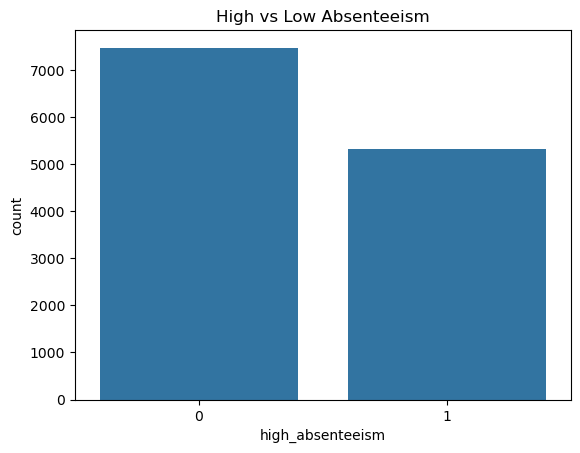

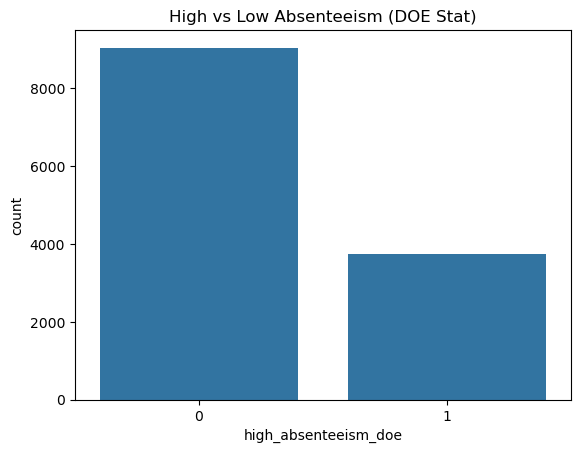

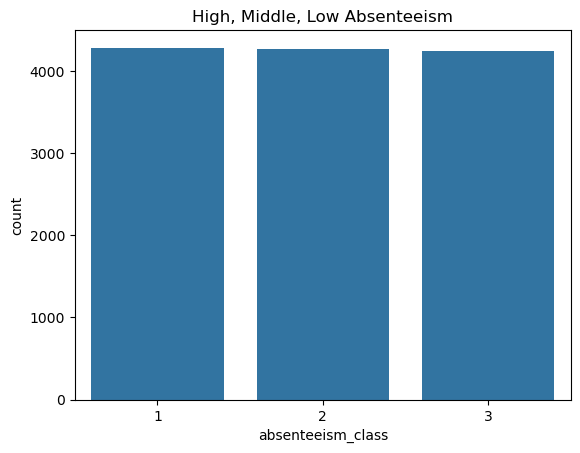

high_absenteeism
0    0.583828
1    0.416172
Name: proportion, dtype: float64 

high_absenteeism_doe
0    0.706953
1    0.293047
Name: proportion, dtype: float64 

absenteeism_class
1    0.334922
2    0.333594
3    0.331484
Name: proportion, dtype: float64 



In [5]:
# Visualize class distribution
sns.countplot(x="high_absenteeism", data=df)
plt.title("High vs Low Absenteeism")
plt.show()

# Visualize class distribution
sns.countplot(x="high_absenteeism_doe", data=df)
plt.title("High vs Low Absenteeism (DOE Stat)")
plt.show()

# Visualize class distribution
sns.countplot(x="absenteeism_class", data=df)
plt.title("High, Middle, Low Absenteeism")
plt.show()

# Display class proportions
print(df["high_absenteeism"].value_counts(normalize=True), "\n")
print(df["high_absenteeism_doe"].value_counts(normalize=True), "\n")
print(df["absenteeism_class"].value_counts(normalize=True), "\n")

### Univariate Histograms
Histograms for `chronic_absentee_ratio` and `student_poverty_ratio` show their distributions. We aslo iterate through all columns ending in `_pct` (demographic percentages) to generate histograms for each, helping uncover skewed or bimodal distributions.

We notice that most demographic percentages are skewed to the right, indicating a low percentage of students from certain racial groups, and a few schools with a very high percentage. This could suggest that the dataset is not fully representative of the population, which may affect our model"s performance. The white percentage is relatively evenly spread with a hump between 80-100% meaning a lot of the schools we have data on are predominantly white.

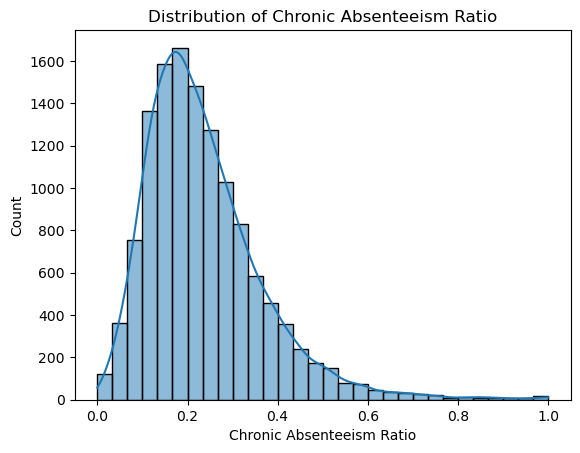

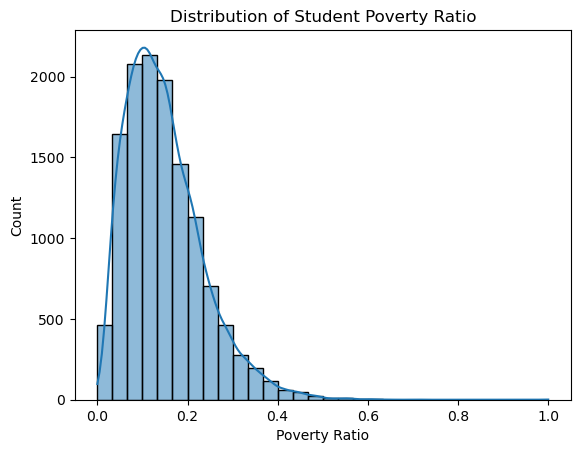

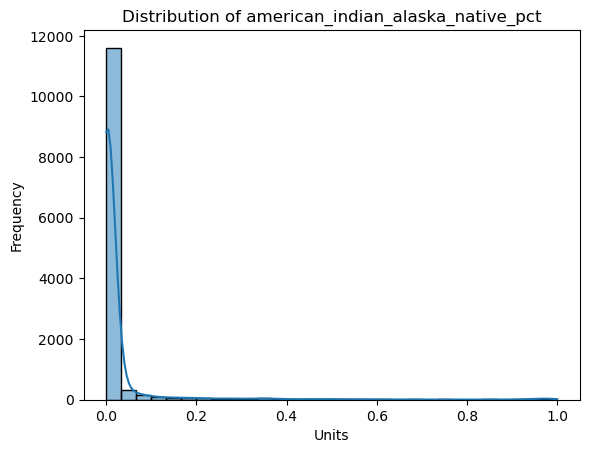

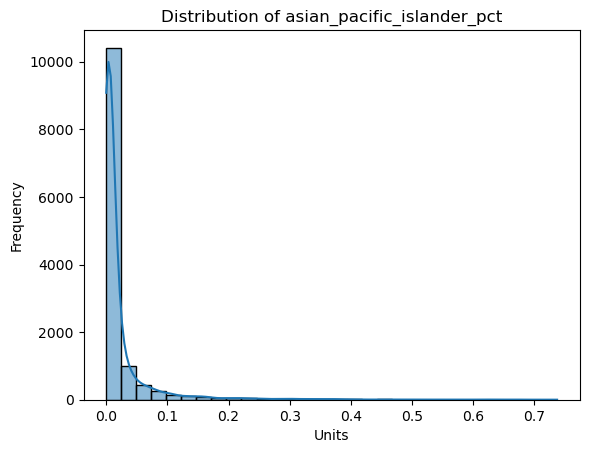

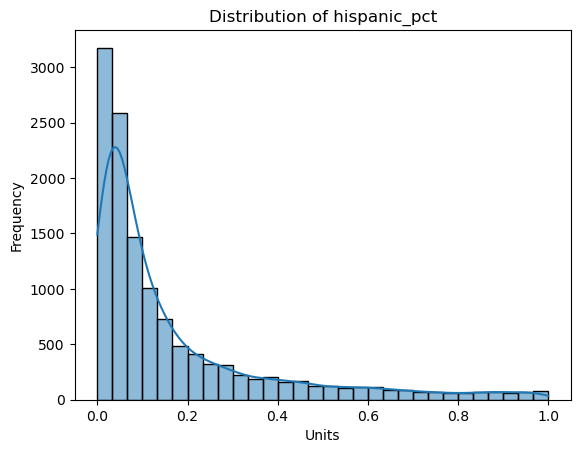

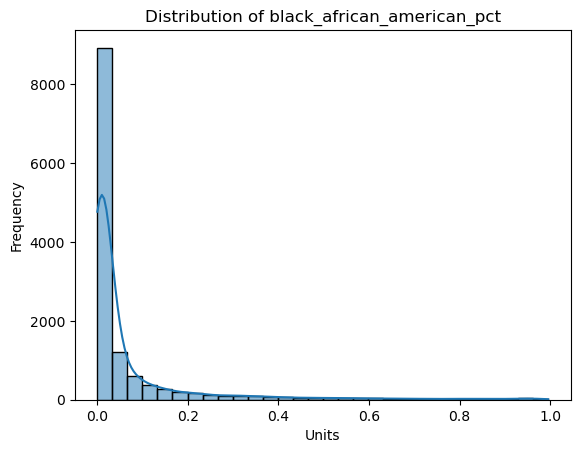

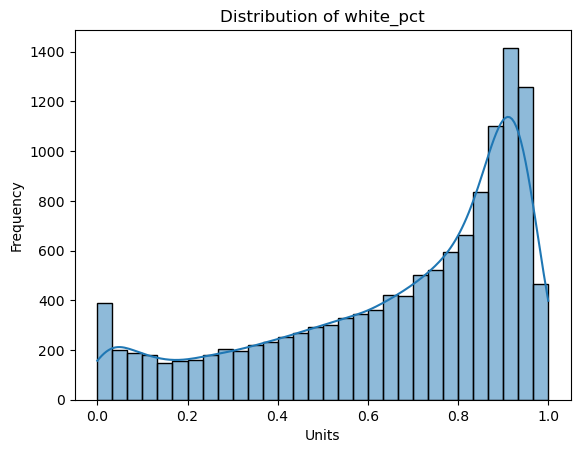

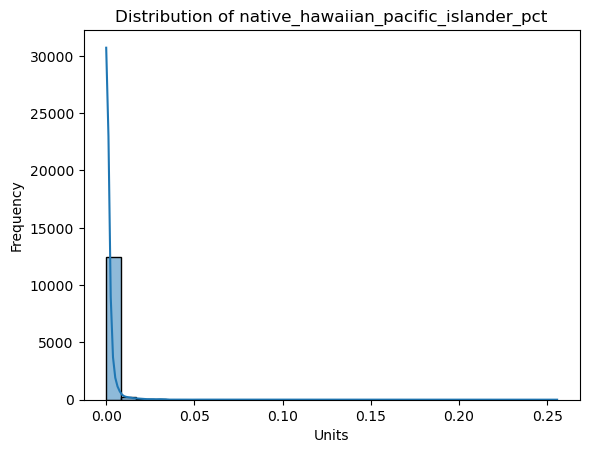

In [6]:
# Histogram of chronic absenteeism ratio
sns.histplot(df["chronic_absentee_ratio"], bins=30, kde=True)
plt.title("Distribution of Chronic Absenteeism Ratio")
plt.xlabel("Chronic Absenteeism Ratio")
plt.ylabel("Count")
plt.show()

# Histogram of student poverty ratio
sns.histplot(df["student_poverty_ratio"], bins=30, kde=True)
plt.title("Distribution of Student Poverty Ratio")
plt.xlabel("Poverty Ratio")
plt.ylabel("Count")
plt.show()

# Histograms for all percentage columns
for col in df.columns:
    if col.endswith("_pct"):
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f"Distribution of {col}")
        plt.xlabel("Units")
        plt.ylabel("Frequency")
        plt.show()

### Distribution of Absenteeism by State
A boxplot grouped by `state_name` gives us a visual sense of absenteeism variability across different states. We notice that chronic absenteeism is more prevalent in certain states, while others have lower rates. A bar chart ranks states by average chronic absenteeism, offering regional insights that could guide policy or further study.

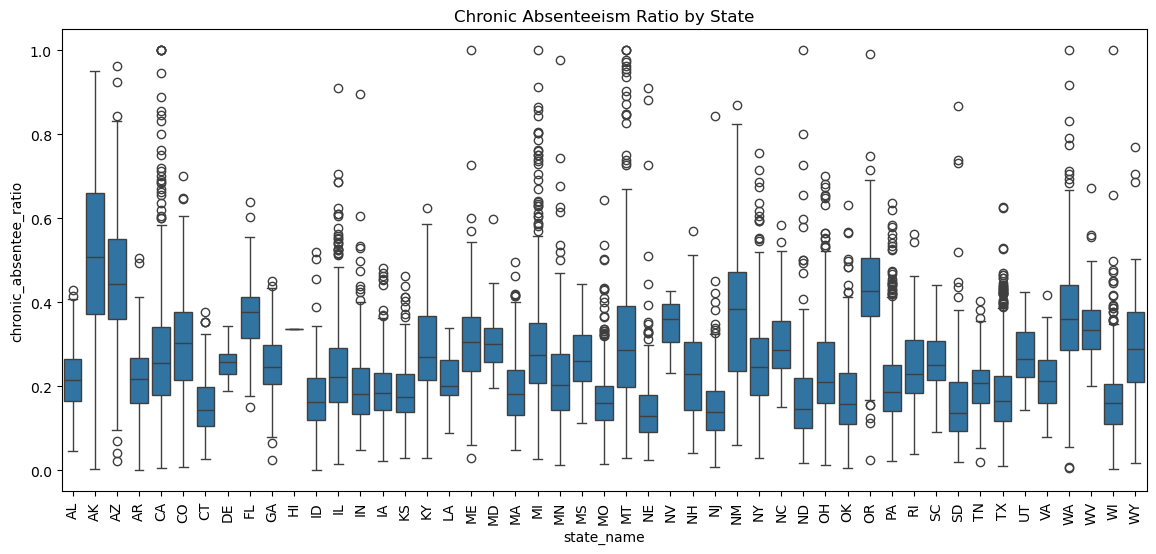

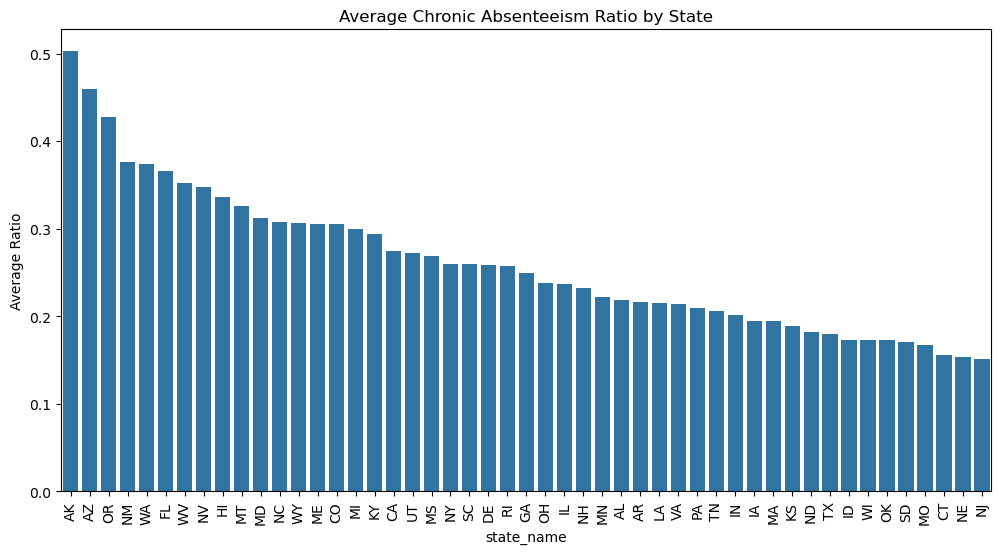

In [7]:
# Boxplot: absenteeism ratio by state
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x="state_name", y="chronic_absentee_ratio")
plt.xticks(rotation=90)
plt.title("Chronic Absenteeism Ratio by State")
plt.show()

# Bar plot: Average absenteeism by state
state_avg = df.groupby("state_name")["chronic_absentee_ratio"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=state_avg.index, y=state_avg.values)
plt.xticks(rotation=90)
plt.title("Average Chronic Absenteeism Ratio by State")
plt.ylabel("Average Ratio")
plt.show()

### Bivariate Scatter Plots
Several scatter plots help us visualize relationships between key variables:
- Poverty ratio and absenteeism
- Expenditures and absenteeism
- School size and absenteeism
- AI/NA % and absenteeism

Each plot offers insights into potential predictors or confounders. We can see that there may be some positive correlation between absenteeism and poverty ration, as well as, race. 

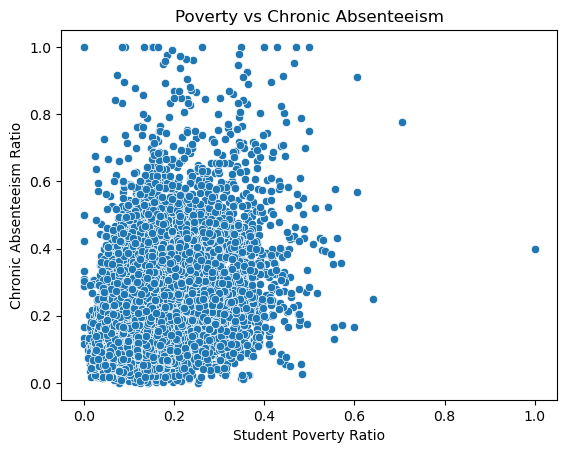

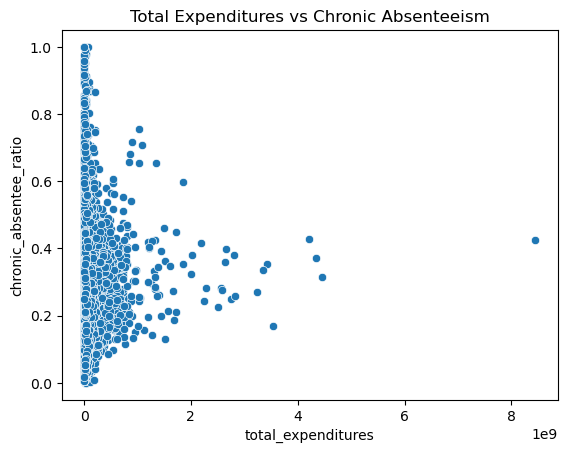

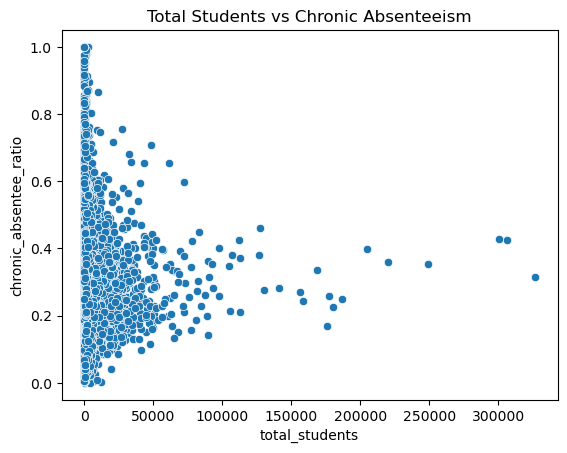

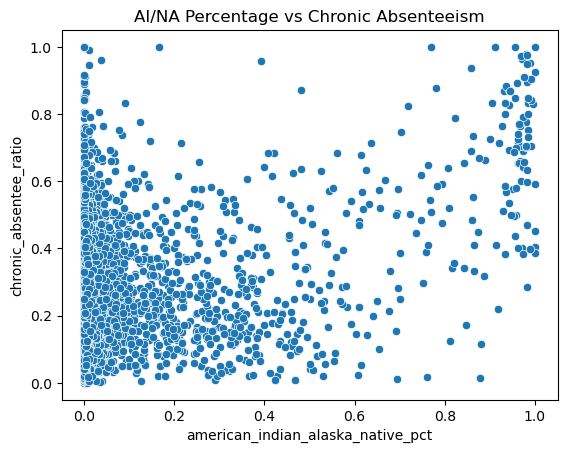

In [8]:

# Scatter plot: Poverty vs Absenteeism
sns.scatterplot(data=df, x="student_poverty_ratio", y="chronic_absentee_ratio")
plt.title("Poverty vs Chronic Absenteeism")
plt.xlabel("Student Poverty Ratio")
plt.ylabel("Chronic Absenteeism Ratio")
plt.show()

# Scatter plot: Total Expenditures vs Absenteeism
sns.scatterplot(data=df, x="total_expenditures", y="chronic_absentee_ratio")
plt.title("Total Expenditures vs Chronic Absenteeism")
plt.show()

# Scatter plot: Total Students vs Absenteeism
sns.scatterplot(data=df, x="total_students", y="chronic_absentee_ratio")
plt.title("Total Students vs Chronic Absenteeism")
plt.show()

# Scatter plot: AI/NA % vs Absenteeism
sns.scatterplot(data=df, x="american_indian_alaska_native_pct", y="chronic_absentee_ratio")
plt.title("AI/NA Percentage vs Chronic Absenteeism")
plt.show()


### Correlation Heatmap
We isolate numeric columns and compute a correlation matrix, visualizing it with a heatmap. This helps spot strong positive/negative relationships among features.

There are a couple variables with strong correlation with our target variable, but others have a weak relationship with it. Further, there is a lot of strong correlation between our features, which may indicate multicollinearity. This is somewhat expected as we have a total column for each pair of female/male race breakdowns for the chronically absent children. We will need to be careful with this when we build our model.

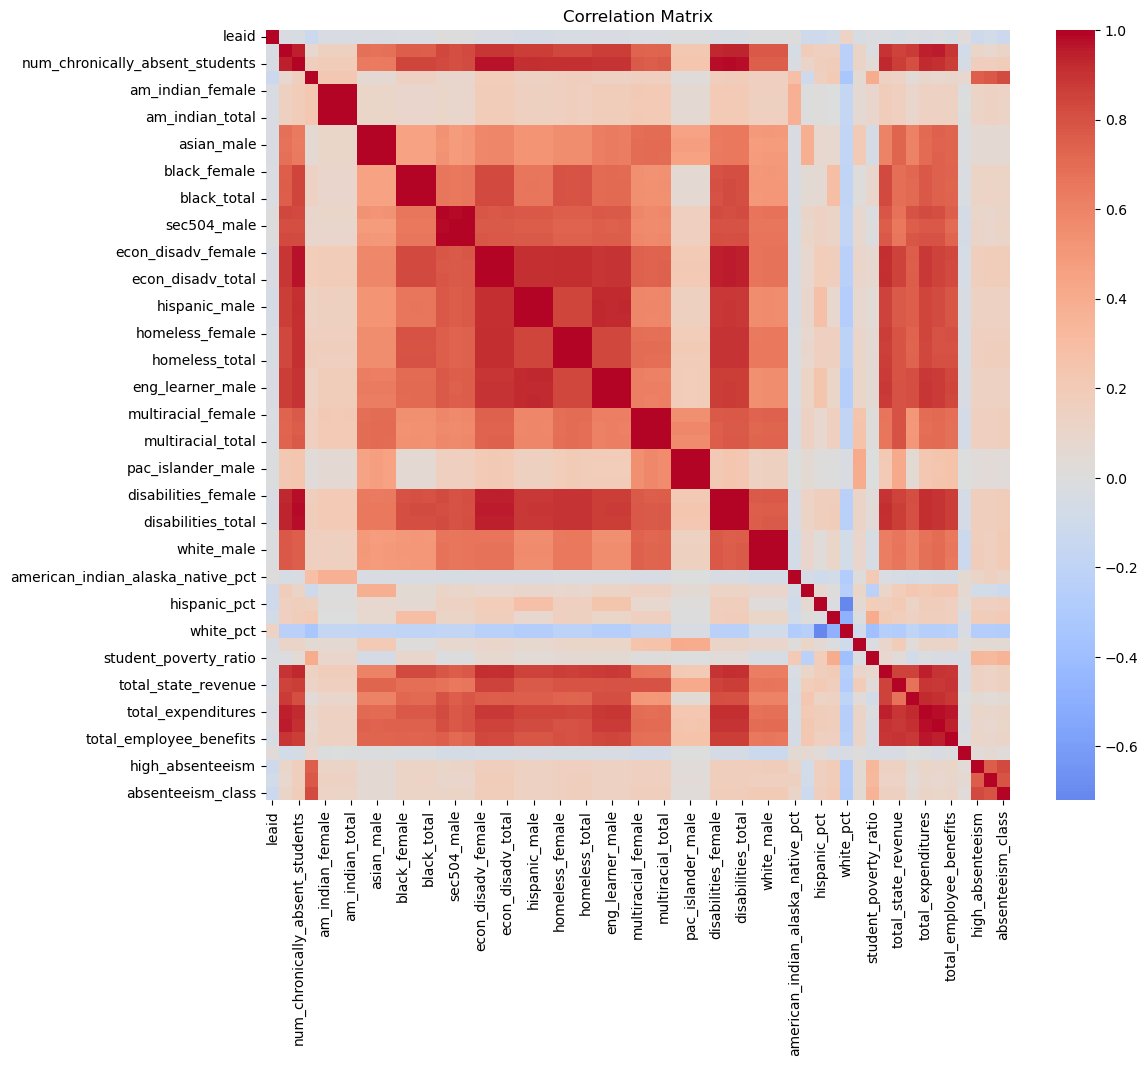

In [9]:
# Select only numeric columns for correlation matrix
numeric_cols = df.select_dtypes(include="number")

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Matrix")
plt.show()

### PCA for Dimensionality Reduction
We extract all columns starting from the 6th onward, excluding the target variable. Features are standardized, and PCA reduces the dimensions to two. The result is visualized with a scatter plot colored by absenteeism class — helpful for assessing separability and structure in the data.

Unfortunately, it does not appear that our data is easily separable in this 2D space but we do see some clustering of the absenteeism classes. While they do overlap, we are hopeful that a more complex model will be able to learn the differences between the classes.

<Axes: >

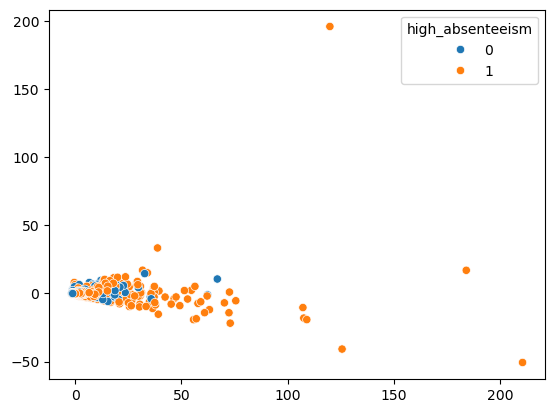

In [10]:
# PCA on features starting from column 6 onwards
features = df.iloc[:, 6:].drop(columns=["high_absenteeism"])

# Standardize feature matrix (excluding rows with missing values)
X_scaled = StandardScaler().fit_transform(features.dropna())

# Apply PCA and reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA scatterplot colored by absenteeism class
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df.loc[features.dropna().index, "high_absenteeism"])